In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [18]:
# Load the dataset (replace with your file path)
df = pd.read_csv('electricity_bill_dataset.csv')
# Display first few rows
print("Dataset preview:\n", df.head())

Dataset preview:
    Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1 

In [19]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [20]:

# Define features and target
X = df.drop(['ElectricityBill'], axis=1)  # Adjust this to your target column
y = df['ElectricityBill']

In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [22]:
# Prediction
y_pred = regressor.predict(X_test)

R² Score: 0.9739509543700914
Mean Squared Error: 29680.777237595987


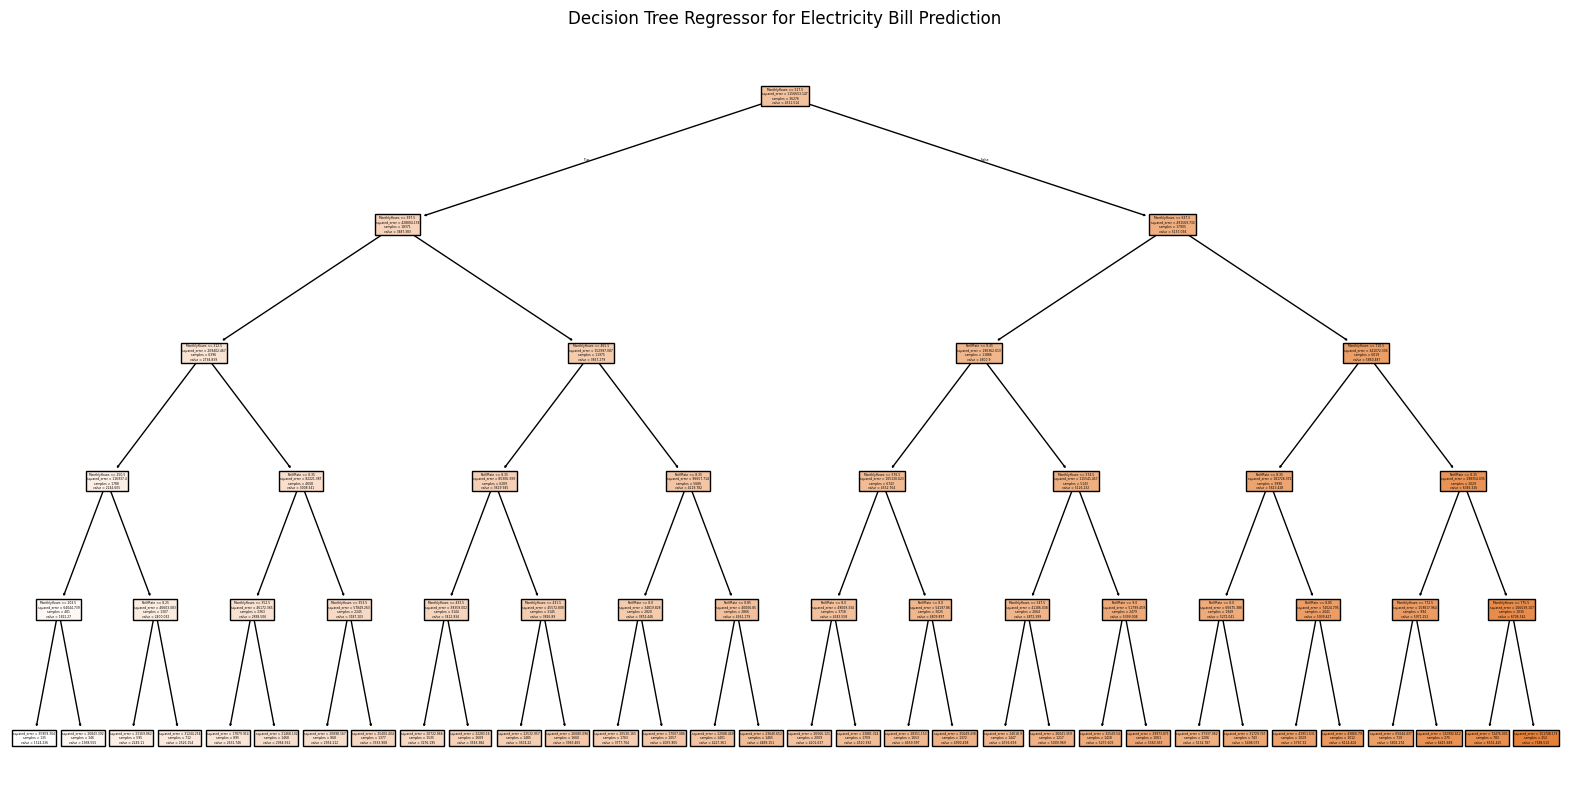

In [23]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.title("Decision Tree Regressor for Electricity Bill Prediction")
plt.show()